In [10]:
#pip install scipy

In [11]:
# IMPORT LABRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [12]:
# create the dataset

np.random.seed(42)  #You get the same random numbers every time you run the code.

# Dataset

data ={
    'product_id' : range(1,21),
    'product_name' : [f'Product{i}' for i in range(1,21)],
    'category' : np.random.choice(['Electronic','Clothing','Home','Sport'],20),
    'unit_sold' : np.random.poisson(lam=20,size=20),
    'sales_date' : pd.date_range(start='2023-01-01',periods=20,freq='D')   
}

sales_data =pd.DataFrame(data)

print('Sales Data:')
print(sales_data)

Sales Data:
    product_id product_name    category  unit_sold sales_date
0            1     Product1        Home         25 2023-01-01
1            2     Product2       Sport         15 2023-01-02
2            3     Product3  Electronic         17 2023-01-03
3            4     Product4        Home         19 2023-01-04
4            5     Product5        Home         21 2023-01-05
5            6     Product6       Sport         17 2023-01-06
6            7     Product7  Electronic         19 2023-01-07
7            8     Product8  Electronic         16 2023-01-08
8            9     Product9        Home         21 2023-01-09
9           10    Product10    Clothing         21 2023-01-10
10          11    Product11        Home         17 2023-01-11
11          12    Product12        Home         22 2023-01-12
12          13    Product13        Home         14 2023-01-13
13          14    Product14        Home         17 2023-01-14
14          15    Product15       Sport         17 2023-01

In [13]:
# save dataframe to csv file

sales_data.to_csv('sales_data.csv',index=False)

In [14]:
import os
os.getcwd() # File location in system

'c:\\Users\\VICTUS\\Desktop\\mastering git\\Practise git\\Projects'

In [15]:
# Descriptive Stats

descriptive_stats = sales_data['unit_sold'].describe()

print('\nDescriptive statistic for Unit Sold: ')
print(descriptive_stats)

mean_sales= sales_data['unit_sold'].mean()
median_sales=sales_data['unit_sold'].median()
mode_sales=sales_data['unit_sold'].mode()[0]
variance_sales=sales_data['unit_sold'].var()
std_deviation_sales=sales_data['unit_sold'].std()

category_stats =sales_data.groupby('category')['unit_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns = ['Category', 'Total Units Sold', 'Average Units Sold', 'Std Dev of Units Sold']

# Display the result

print('\nStatistical Analysis:')
print(f'Mean Units Sold: {mean_sales}')
print(f'Median Units Sold: {median_sales}')
print(f'Mode Units Sold: {mode_sales}')
print(f'Variance Units Sold: {variance_sales}')
print(f'Standard Deviation Units Sold: {std_deviation_sales}')
print('\nCategory Statistics')
print(category_stats)


Descriptive statistic for Unit Sold: 
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: unit_sold, dtype: float64

Statistical Analysis:
Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 17
Variance Units Sold: 10.905263157894737
Standard Deviation Units Sold: 3.302311789927586

Category Statistics
     Category  Total Units Sold  Average Units Sold  Std Dev of Units Sold
0    Clothing                21           21.000000                    NaN
1  Electronic                73           18.250000               2.217356
2        Home               181           20.111111               3.723051
3       Sport               101           16.833333               2.714160


In [16]:
# Inferential Stats

confidence_level =0.95

degrees_freedom =len(sales_data['unit_sold'])-1
sample_mean = mean_sales
sample_standard_error= std_deviation_sales/np.sqrt(len(sales_data['unit_sold']))

# t-score

t_score = stats.t.ppf((1+confidence_level)/2,degrees_freedom)
margin_of_error = t_score*sample_standard_error

confidence_intervel= (sample_mean - margin_of_error,sample_mean + margin_of_error)
print('\n Confidence Interval for Mean of Unit sold')
print(confidence_intervel)


 Confidence Interval for Mean of Unit sold
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [17]:
t_statistic, p_value =stats.ttest_1samp(sales_data['unit_sold'],20)

print('\nHypothesis Testing (t-test):')
print(f'T-statistic :{t_statistic},p-value:{p_value}')

if p_value < 0.05:
    print('Reject the null hypothesis: The mean unit sold is different from 20')
else:
    print('Fail to reject the null hypothesis : The mean unit sold is not different from 20')


Hypothesis Testing (t-test):
T-statistic :-1.6250928099424466,p-value:0.12061572226781002
Fail to reject the null hypothesis : The mean unit sold is not different from 20


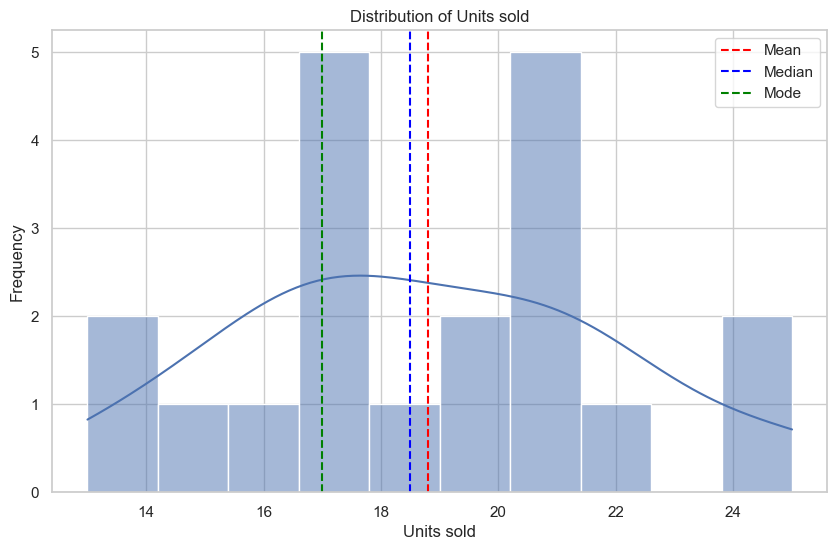

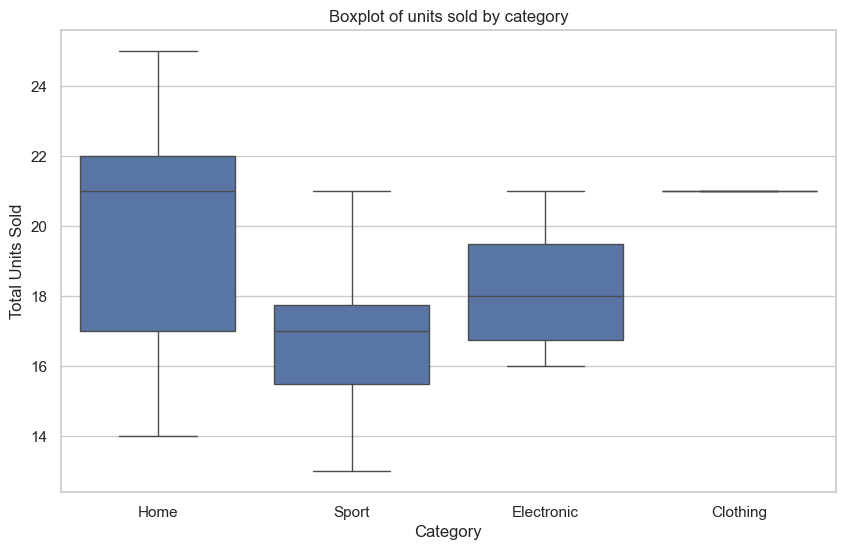

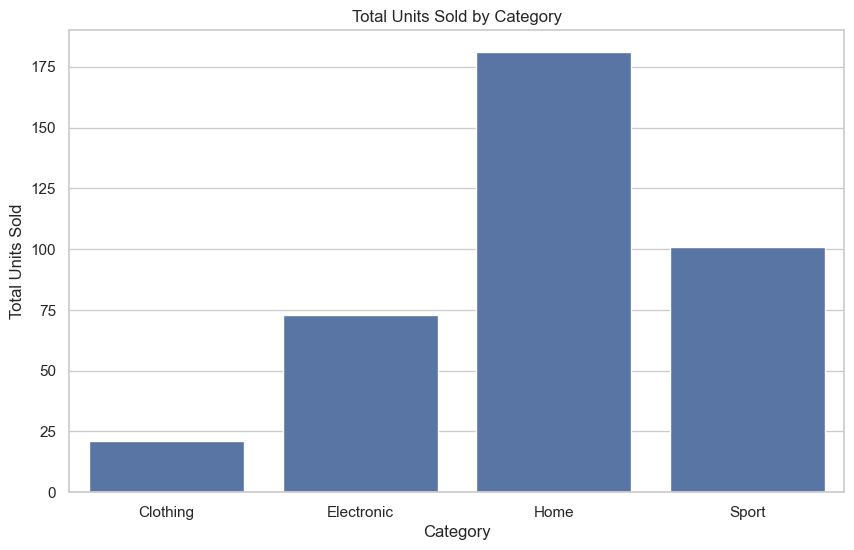

In [19]:
# Visualization

sns.set(style='whitegrid')

#plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['unit_sold'],bins=10,kde=True)
plt.title('Distribution of Units sold')
plt.xlabel('Units sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales,color='red',linestyle='--',label='Mean')
plt.axvline(median_sales,color='blue',linestyle='--',label='Median')
plt.axvline(mode_sales,color='green',linestyle='--',label='Mode')
plt.legend()
plt.show()

#Box plot for Units sold by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category',y='unit_sold',data=sales_data)
plt.title('Boxplot of units sold by category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()

# Bar plot for total units sold by category
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Total Units Sold',data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()


